## Checking for happy sad face using emoji expressions 
__the data has been taken from computer generated emoji's by laurence moroney__

In [1]:
import os
import zipfile

local_zip = r'C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\happy-or-sad')
zip_ref.close()

In [2]:
train_happy_dir = os.path.join(r'C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\happy-or-sad\happy')
print(train_happy_dir)      
train_sad_dir = os.path.join(r'C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\happy-or-sad\sad') 

C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\happy-or-sad\happy


In [3]:
# seeing total files in the dataset
train_happy_names = os.listdir(train_happy_dir)
print("total happy images :",len(train_happy_names)) # printing first 10 files : 
train_sad_names = os.listdir(train_sad_dir)
print("total sad images :",len(train_sad_names))

total happy images : 40
total sad images : 40


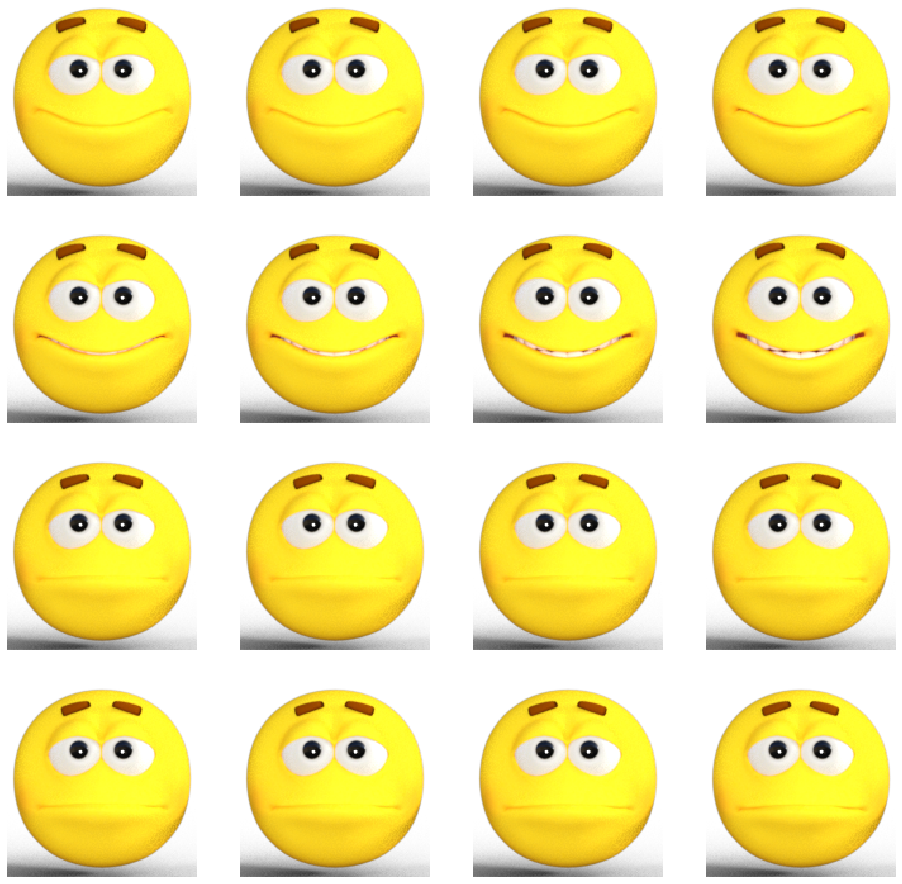

In [4]:
# looking at some images : 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0
fig = plt.gcf() 
fig.set_size_inches(ncols * 4, nrows * 4) # just for enlargment of data  
pic_index += 8
# code to make names of 8 files with their direcotry path in a list see using printing 'next_happy/next_sad'
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname)  
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix + next_sad_pix):
    # Set up subplot; subplot indices start at 1
    # i is just the index for indexing which is produced as a result of enumerating
    sp = plt.subplot(nrows, ncols, i + 1) # defining size and index of image 
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
import tensorflow as tf
# using convolutional neural network : 
# with 5 convolutional layers : 
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)) , # since input images are 150x150
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])
# looking at the data for conversions via convolutions : 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255) # normalizing the data 

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\happy-or-sad',  # This is the source directory for training images
        target_size=(150,150),  # All images will be resized to 150x150
        #batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 80 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      #steps_per_epoch=4,  
      epochs=15,
      verbose=1,
       ) 

Train for 3 steps
Epoch 1/15
3/3 [==============================] - 3s 845ms/step - loss: 0.8672 - accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 1s 384ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 1s 377ms/step - loss: 0.6932 - accuracy: 0.5375
Epoch 4/15
3/3 [==============================] - 1s 301ms/step - loss: 0.6841 - accuracy: 0.6500
Epoch 5/15
3/3 [==============================] - 1s 301ms/step - loss: 0.6863 - accuracy: 0.5000
Epoch 6/15
3/3 [==============================] - 1s 303ms/step - loss: 0.6693 - accuracy: 0.5375
Epoch 7/15
3/3 [==============================] - 1s 296ms/step - loss: 0.6209 - accuracy: 0.7125
Epoch 8/15
3/3 [==============================] - 1s 319ms/step - loss: 0.5240 - accuracy: 0.8500
Epoch 9/15
3/3 [==============================] - 1s 327ms/step - loss: 0.6490 - accuracy: 0.7500
Epoch 10/15
3/3 [==============================] - 1s 330ms/step - loss: 0.2773 - accuracy: 0.9125
E

## Running the model on unseen images trying on human images :

Using TensorFlow backend.


[0.331913]
given image is happy
[0.38413322]
given image is happy
[0.323263]
given image is happy
[0.50433785]
given image is sad


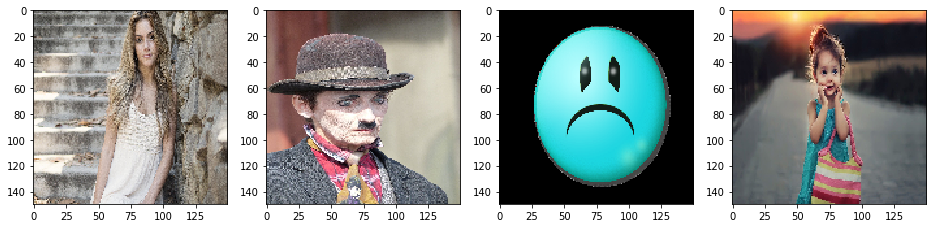

In [8]:
import numpy as np
from keras.preprocessing import image
def model_pred(image):
    classes = model.predict(image)
    print(classes[0])
    if(classes[0] > 0.5):
        print("given image is sad")
    else:
        print("given image is happy")
        
def imgreturn(path):
    uploaded_path = path
    d = img = image.load_img(uploaded_path,target_size=(150,150)) # converted a high pixel image into 150x150
    x = image.img_to_array(img)
    #print(x)                              # array of pixel data
    x = x/255
    #plt.imshow(img)                       # image printed in 150x150
    x = np.expand_dims(x, axis=0) 
    #print(x.shape) # setting dimensions for the model to predict  (1,150,150,3) 1 is by axis = 0
    return x,d
x,fx = imgreturn(r"C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\Sample images\beautiful-1274056_1920.jpg")
x1,fx1 = imgreturn(r"C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\Sample images\charlie-chaplin-898308_1280.jpg")
x2,fx2 = imgreturn(r"C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\Sample images\emoticon-937608_1920.png")
x3,fx3 = imgreturn(r"C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\Sample images\girl-738302_1280.jpg")
f,axarr = plt.subplots(1,4)
f.set_size_inches( 16, 16) 
axarr[0].imshow(fx)
axarr[1].imshow(fx1)
axarr[2].imshow(fx2)
axarr[3].imshow(fx3)
#images = np.vstack([x,x1,x2,x3])
model_pred(x)
model_pred(x1)
model_pred(x2)
model_pred(x3)

### The above images can be seen to have been classified somewhat wrong, But the probability gives that it is doing well. Reasons :
1. It can be seen that in training data the all sad images tend to have straight lips in and here also the given images tested on predicted as sad have almost straight lips. thus curvature if lips determined the sadness here though the eyebrows were not used thus the probability was close to 50% and not anywhere near 70-80 % 
2. The train set since contains less informative data and only based on one feature makes overfitting on training data thus wrong classification of images
3. The third image is sad but is classified as happy, again the curvature of lips curves only on happy faces and stays almost straight on sad so by comparison of curvature it can be seen that the image was classified as happy 

### We can improve on data by using human images and augmenting the data to overcome or reducing layers of neural network to reduce overfitting on data 

### Looking at a perfect smile image(at a different angle) :
Still the percentage is not good !!

[0.42461675]
given image is happy


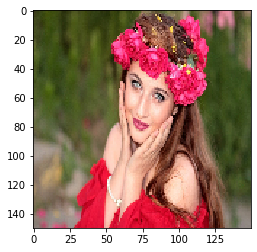

In [9]:
x,f = imgreturn(r"C:\Users\shaur\Desktop\tensor deeplearn\Coded Implementations\tmp2\Sample images\girl-1403458_1280.jpg")
plt.imshow(f)
model_pred(x)